# 데이터, 라이브러리 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

In [3]:
file_path = './data/goodbooks/'

df_book_tags = pd.read_csv(f'{file_path}book_tags.csv')
df_books = pd.read_csv(f"{file_path}books.csv")
df_ratings = pd.read_csv(f'{file_path}ratings.csv')
df_tags = pd.read_csv(f'{file_path}tags.csv')

In [4]:
# 모든 데이터셋 shape 값 확인
df_book_tags.shape, df_books.shape, df_ratings.shape, df_tags.shape

((999912, 3), (10000, 23), (981756, 3), (34252, 2))

# 전처리

## 책 목록 전처리

In [5]:
df_books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
# 불필요한 데이터 행 삭제
df_books = df_books.drop(columns=['id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count',
                                  'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 
                                  'ratings_5', 'image_url','small_image_url'])

In [7]:
df_books = df_books.dropna()
df_books.shape

(8405, 8)

In [8]:
book_duplicated = df_books[df_books.duplicated(subset=['original_title', 'authors', 'original_publication_year'], keep=False)]

In [9]:
book_duplicated

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
122,5358,11,John Grisham,1991.0,The Firm,eng,3.99,488269
1592,13812,58,Raymond E. Feist,1982.0,Magician,en-US,4.17,62432
2268,43916,39,Raymond E. Feist,1982.0,Magician,eng,4.32,43964
3472,6780439,17,L.J. Smith,1991.0,Dark Reunion,eng,4.19,33023
6255,567704,35,Clive Barker,1991.0,Imajica,eng,4.16,15600
7796,395875,59,L.J. Smith,1991.0,Dark Reunion,eng,3.54,17056
7867,452235,161,John Grisham,1991.0,The Firm,eng,3.89,6962
9267,52629,9,Clive Barker,1991.0,Imajica,eng,4.24,9421


In [10]:
book_duplicated_groupby = book_duplicated.groupby(['original_title', 'authors', 'original_publication_year']).agg({'books_count' : 'sum', 'ratings_count' : 'sum'})
book_duplicated_groupby

,,,books_count,ratings_count
original_title,authors,original_publication_year,,
Dark Reunion,L.J. Smith,1991.0,76,50079
Imajica,Clive Barker,1991.0,44,25021
Magician,Raymond E. Feist,1982.0,97,106396
The Firm,John Grisham,1991.0,172,495231


In [11]:
df_books = df_books.drop_duplicates(subset=['original_title', 'authors', 'original_publication_year'])
df_books

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664
...,...,...,...,...,...,...,...,...
9994,15613,199,Herman Melville,1924.0,"Billy Budd, Sailor",eng,3.09,10866
9995,7130616,19,Ilona Andrews,2010.0,Bayou Moon,eng,4.09,17204
9996,208324,19,Robert A. Caro,1990.0,Means of Ascent,eng,4.25,12582
9997,77431,60,Patrick O'Brian,1977.0,The Mauritius Command,eng,4.35,9421


In [12]:
df_books.head()

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664


In [13]:
# 값 대체
for n in range(len(book_duplicated_groupby.index)):
    a = book_duplicated.loc[(book_duplicated['original_title'] == book_duplicated_groupby.index[n][0])][['average_rating', 'ratings_count']]
    count = book_duplicated_groupby['books_count'][n]
    rate_count = a.iloc[0, 1] + a.iloc[1, 1]
    avg_rate = ((a.iloc[0, 0] * a.iloc[0, 1]) + (a.iloc[1, 0] * a.iloc[1, 1])) / rate_count
    df_books.loc[df_books.loc[(df_books['original_title'] == book_duplicated_groupby.index[n][0])].index][['books_count', 'average_rating', 'ratings_count']] = [count, avg_rate, count]

## 평점 전처리
전처리 대상
* 동일 고객이 동일 책에 대해 중복으로 평점을 부여하는 경우
* 동일 고객이 동일 책에 대해 다른 평점을 부여하는 경우    

사실 drop_duplicates()에서 subset을 사용할 수는 있지만 그럴 경우 중복으로 잘 못 입력된 데이터도 전부 다 삭제된다.

In [14]:
print(df_ratings.shape)
df_ratings.head()

(981756, 3)


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


### 1번 경우 전처리
중복값 삭제

In [15]:
# 1번 경우 전처리
# 중복값 삭제
df_ratings = df_ratings.drop_duplicates()
df_ratings.shape

(980112, 3)

### 2번 경우 전처리
모든 값 삭제

In [16]:
# 2번 경우 전처리 
# 모든 값 삭제
rate_check = df_ratings.groupby(['book_id', 'user_id']).count()
rate_check = rate_check[rate_check['rating'] > 1]

In [17]:
# rate_check.drop_duplicates(subset=['book_id', 'user_id'], keep=False, inplace=True)

for n in range(len(rate_check.index)):
    df_ratings = df_ratings.loc[~((df_ratings['book_id'] == rate_check.index[n][0]) & (df_ratings['user_id'] == rate_check.index[n][1]))]

df_ratings.shape

(978845, 3)

In [18]:
# 중복이 2개 초과인 사람 확인하기
rate_check[rate_check['rating'] > 2]

,,rating
book_id,user_id,
1071,36535,3


In [19]:
# shape 값이 맞는지 확인하기
980112 - (632 * 2) - 3

978845

## 북 태그 데이터 전처리

In [20]:
print(df_book_tags.shape)
df_book_tags.head()

(999912, 3)


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [21]:
df_book_tags = df_book_tags.groupby(['goodreads_book_id', 'tag_id']).sum()
print(df_book_tags.shape)

(999904, 1)


In [22]:
df_book_tags

count
goodreads_book_id tag_id       
1                 615       399
                  1120      283
                  1128      828
                  1691     1742
                  2104     1022
...                         ...
33288638          29316       9
                  29401       9
                  30521       9
                  30574   14116
                  31545      10

[999904 rows x 1 columns]

## 태그 데이터 전처리

In [23]:
print(df_tags.shape)
df_tags.head()

(34252, 2)


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [24]:
# 중복값 없음
df_tags.duplicated(subset='tag_id').sum()

0

# Visualization

## Book

### Book Rating EDA

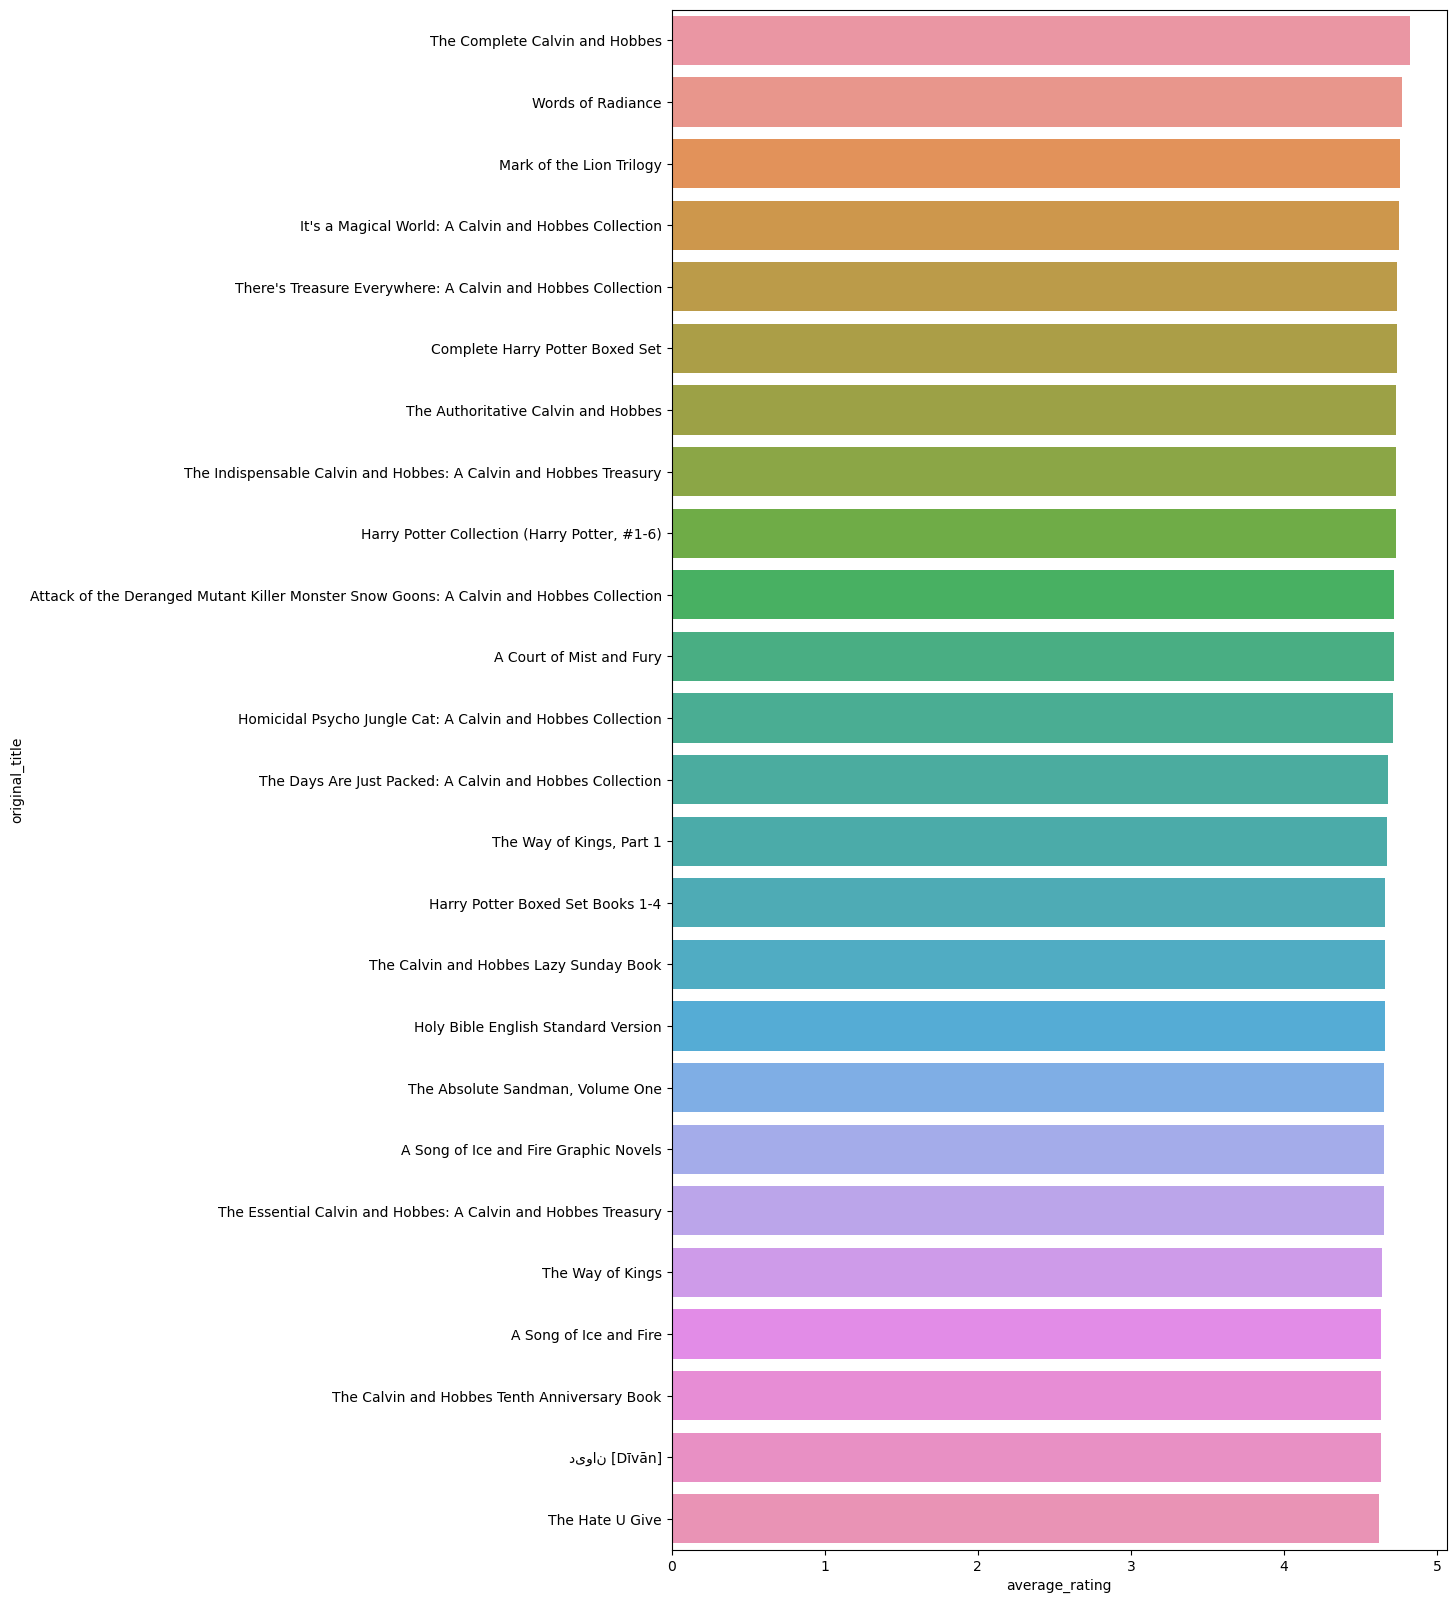

In [25]:
top_rated = df_books.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated[:25]
plt.figure(figsize=(10, 20))
sns.barplot(tf_top_rated, x='average_rating', y='original_title');

In [26]:
fig = px.treemap(tf_top_rated, path=['original_title'], values='average_rating',title='Top Rated Books', width=1000, height=700)
fig.show()

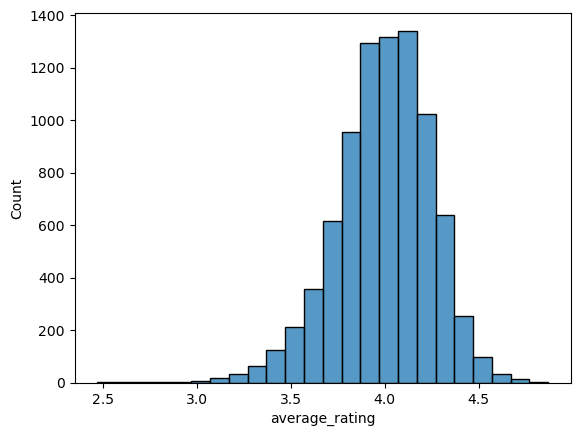

In [27]:
sns.histplot(df_books, x='average_rating', binwidth=0.1);

### Book Popularity EDA

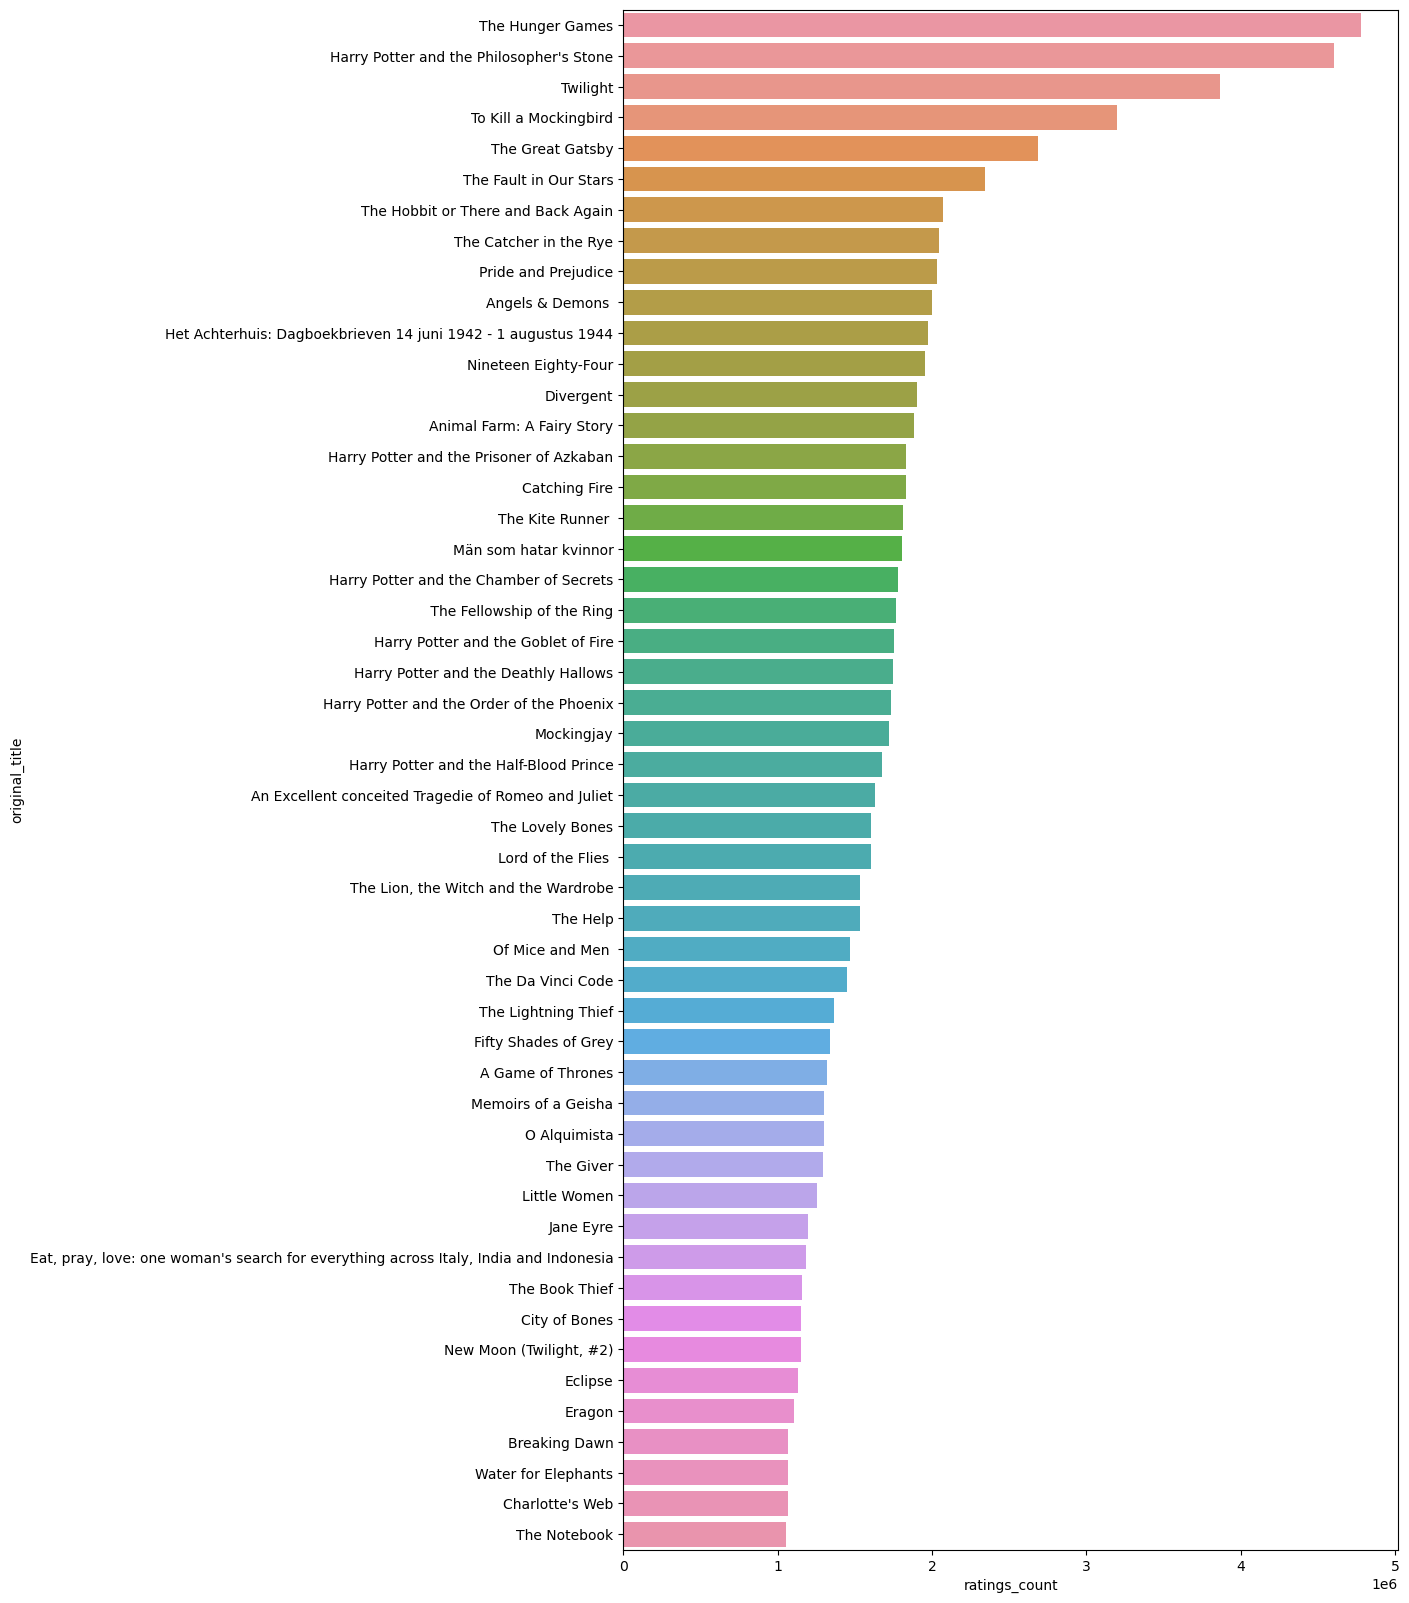

In [28]:
top_popular = df_books.sort_values('ratings_count', ascending=False)
fifty_top_popular = top_popular[:50]
plt.figure(figsize=(10, 20))
sns.barplot(fifty_top_popular, x='ratings_count', y='original_title');

In [29]:
fig = px.treemap(fifty_top_popular, path=['original_title'], values='ratings_count',title='Popular Books', width=1000, height=700)
fig.show()

## Author

### Popular Authors

In [30]:
fifty_top_authors = top_rated[:50]
fig = px.treemap(fifty_top_authors, path=['authors'], values='average_rating',title='Popular Authors', width=1000, height=700)
fig.show()

### Prolific Authros

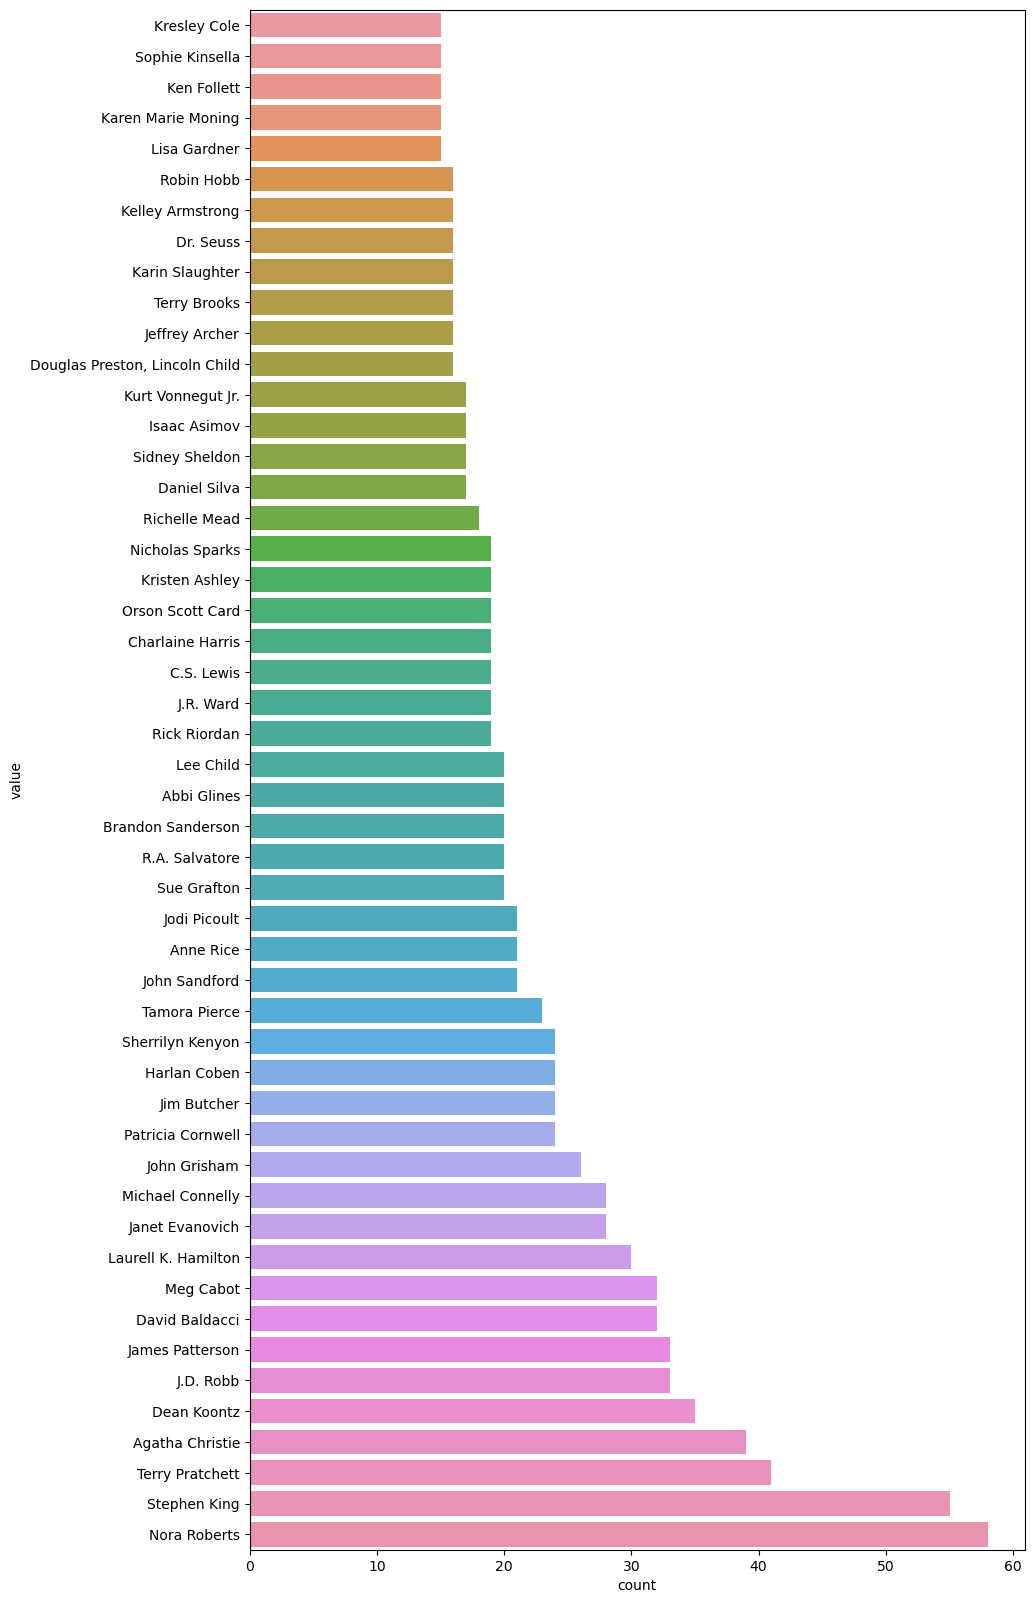

In [31]:
top_author_counts = df_books['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
plt.figure(figsize=(10, 20))
sns.barplot(top_author_counts.tail(50), x='count', y='value');

## Wordclouds

In [32]:
from wordcloud import WordCloud,STOPWORDS

In [33]:
stop_words=set(STOPWORDS)
author_string = " ".join(df_books['authors'])
title_string = " ".join(df_books['original_title'])

In [34]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

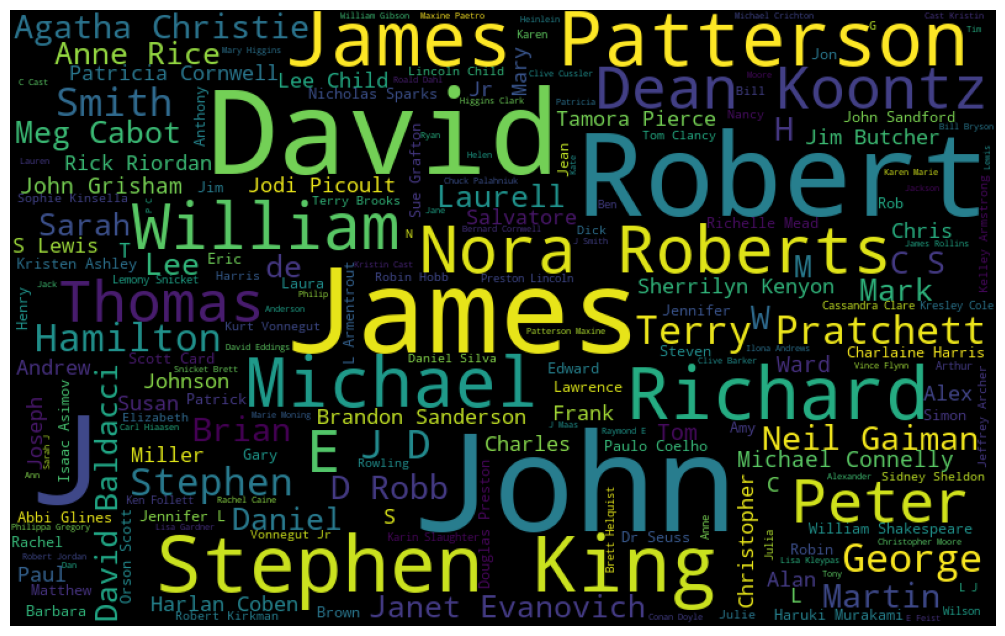

In [35]:
wordcloud(author_string)

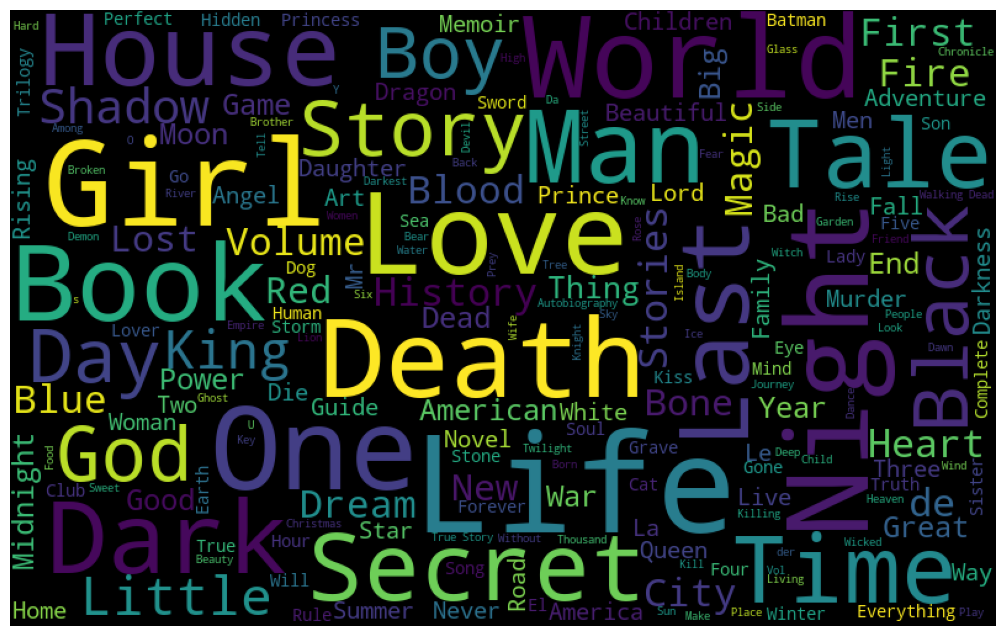

In [36]:
wordcloud(title_string)

## Personal Rating

### Distribution of Rating

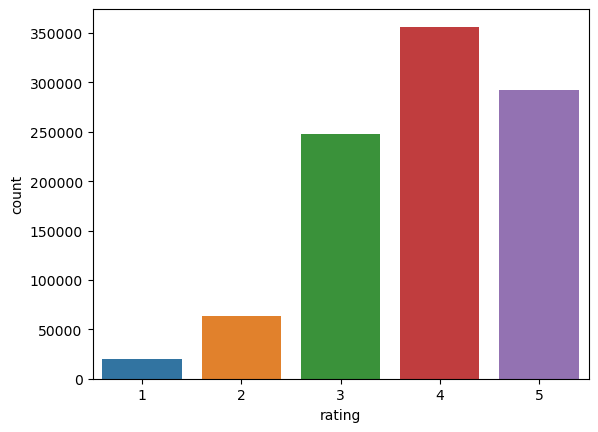

In [37]:
sns.countplot(df_ratings, x='rating');

### Number of Rating per User

In [38]:
rating_groupby = df_ratings.groupby('user_id').agg({'rating' : 'mean', 'book_id' : 'count'})

In [39]:
rating_groupby.columns = ['avg_rate', 'num_of_books']

In [40]:
rating_groupby = rating_groupby.sort_values(by='num_of_books', ascending=False)
rating_groupby

,avg_rate,num_of_books
user_id,,
12874,3.450000,200
30944,4.210000,200
12381,3.427136,199
28158,3.939698,199
52036,3.442211,199
...,...,...
33596,5.000000,1
52747,5.000000,1
31452,5.000000,1


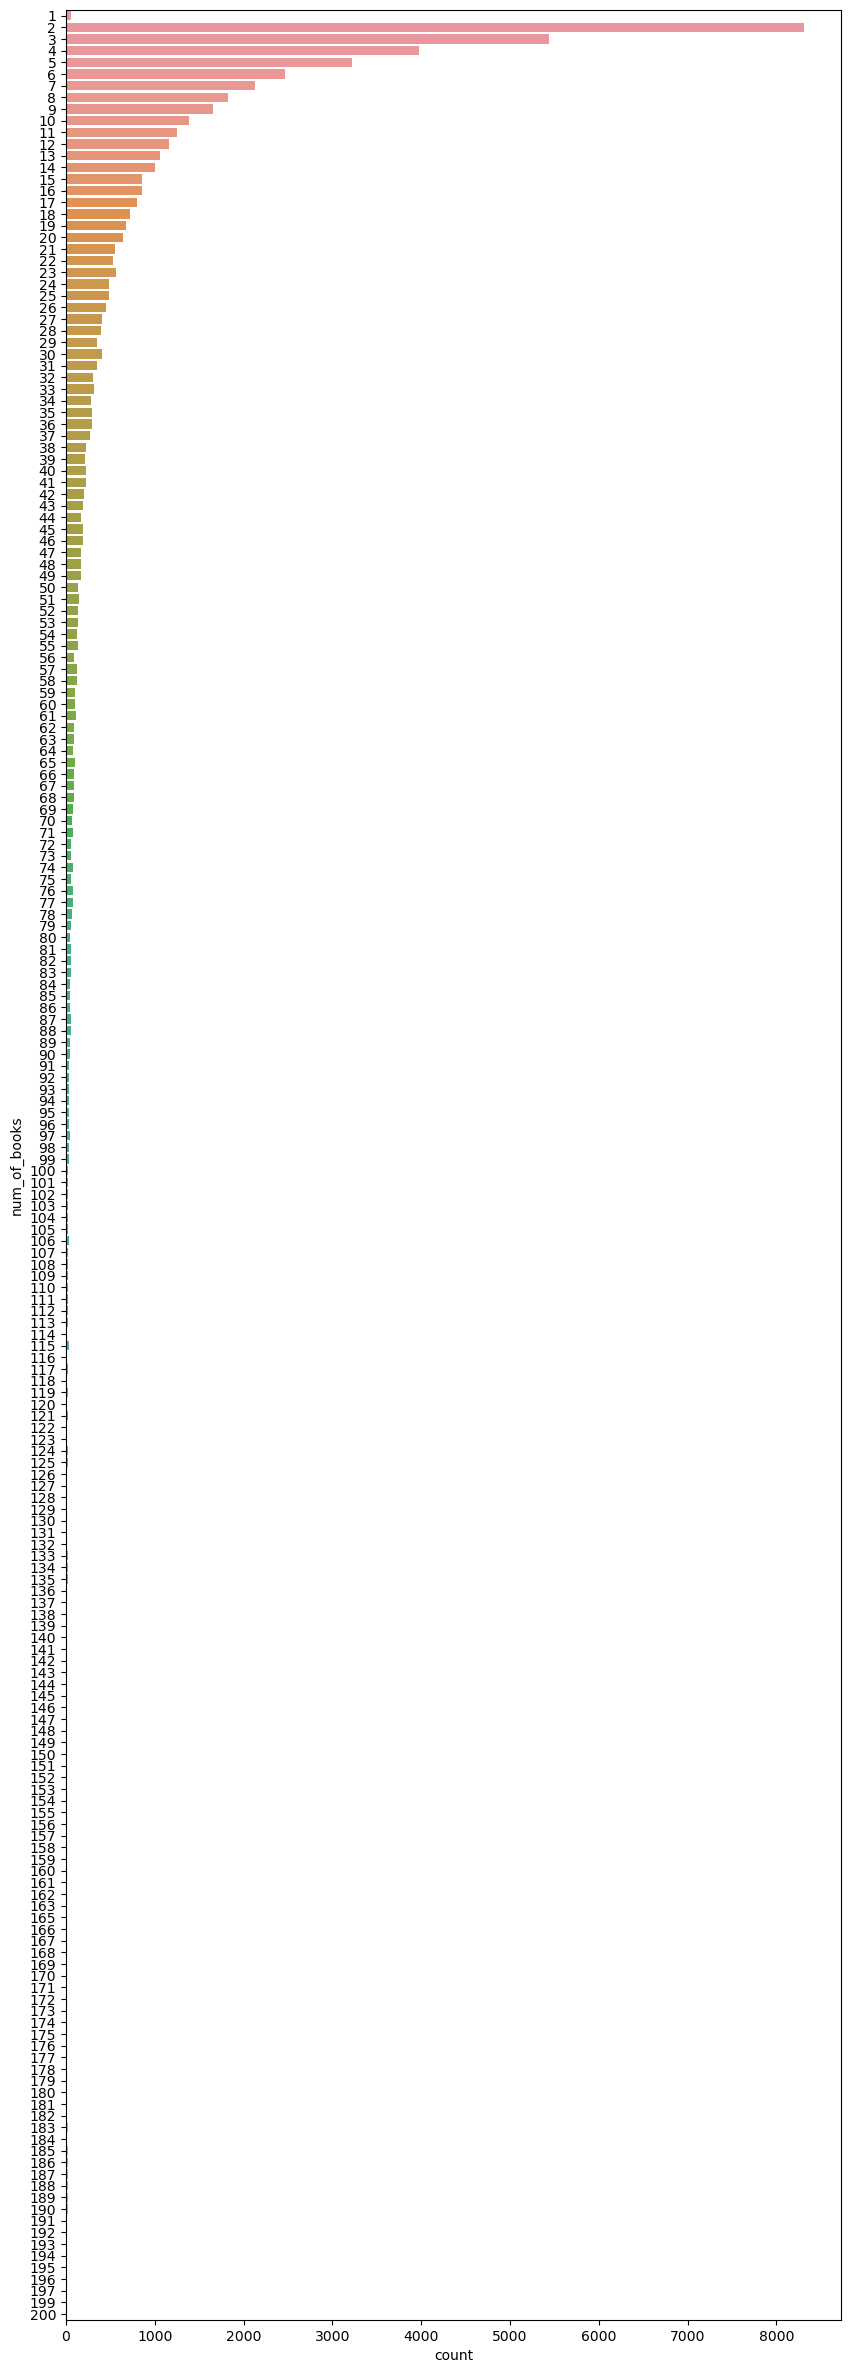

In [41]:
plt.figure(figsize=(10, 30))
sns.countplot(rating_groupby, y='num_of_books');

### Average Rating of User

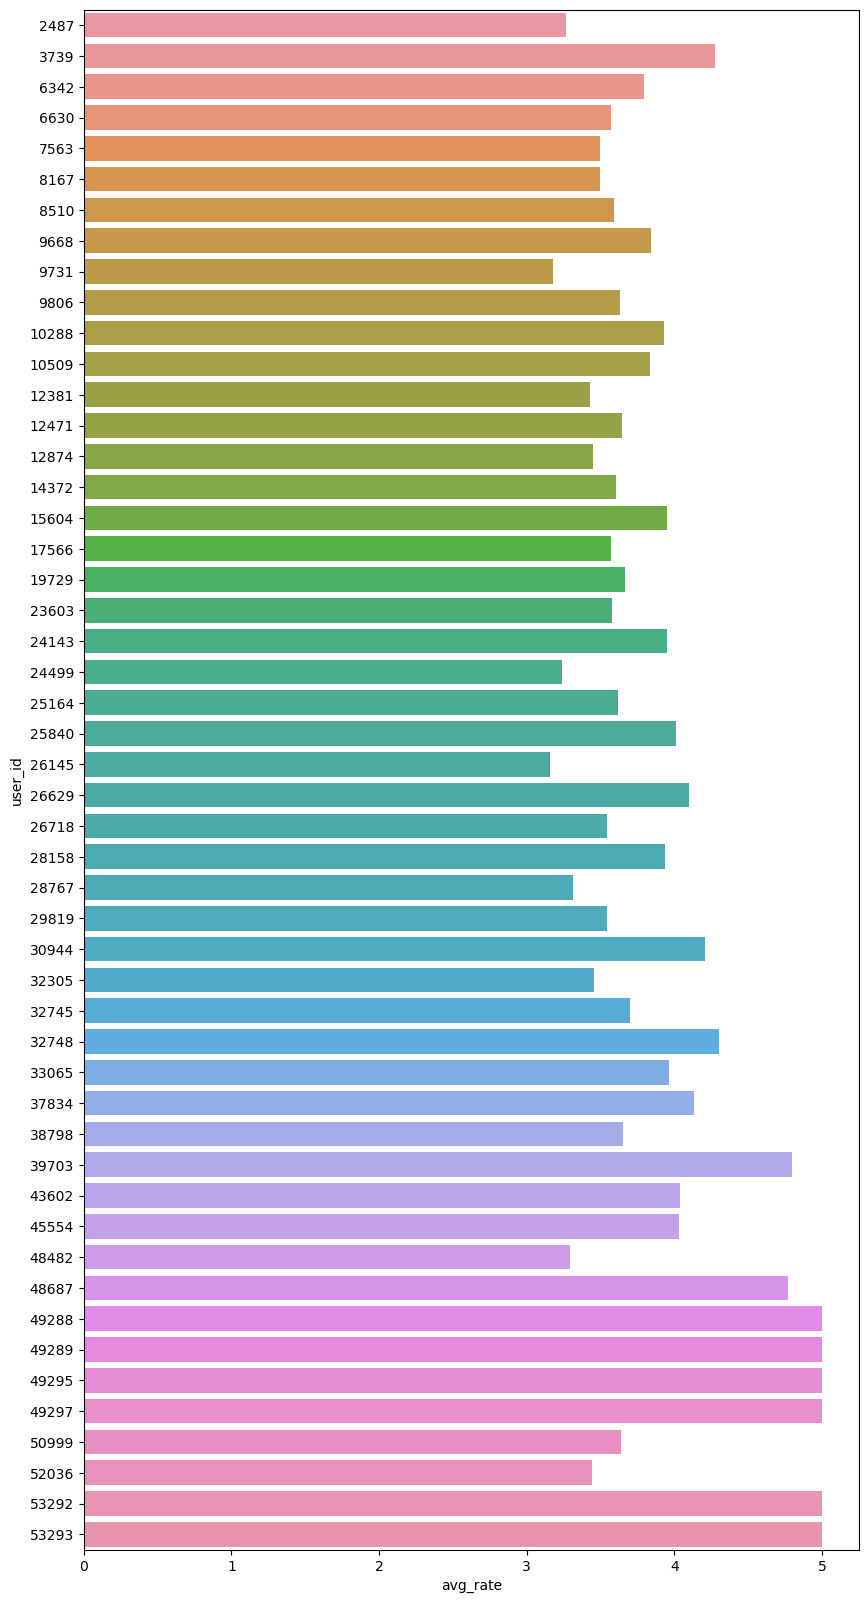

In [42]:
plt.figure(figsize=(10, 20))
sns.barplot(rating_groupby.head(50), x='avg_rate', y=rating_groupby.head(50).index, orient='h');

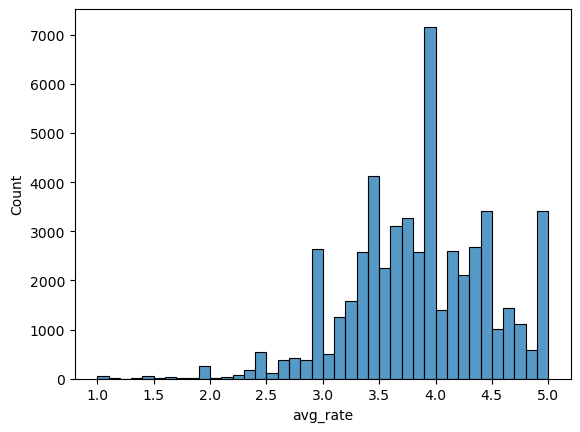

In [43]:
sns.histplot(rating_groupby, x='avg_rate', binwidth=0.1);

## Tag

In [44]:
df_tag = df_book_tags.merge(df_tags, on='tag_id', how='outer')
df_tag.sample(10)

,tag_id,count,tag_name
823930,33127,10,young-adult-literature
871204,29073,18,suspence
270243,27535,10,shelfari-favorites
687393,5393,12,books-to-buy
856616,30692,7,to-read-historical-fiction
476312,23349,5,personal-library
684913,6836,3,childhood-faves
817765,32726,15,womens-fiction
999359,10212,1,ebooks-i-may-never-read
167687,18045,28,library


In [45]:
num_by_tags = pd.DataFrame(df_tag.groupby('tag_name')['count'].sum())
num_by_tags = num_by_tags.sort_values('count', ascending=False)
num_by_tags

,count
tag_name,
to-read,140718761
currently-reading,7507958
favorites,4503173
fiction,3688819
fantasy,3548157
...,...
american-20c,1
comics-later-volumes,1
paused-and-not-intending-to-resume,1


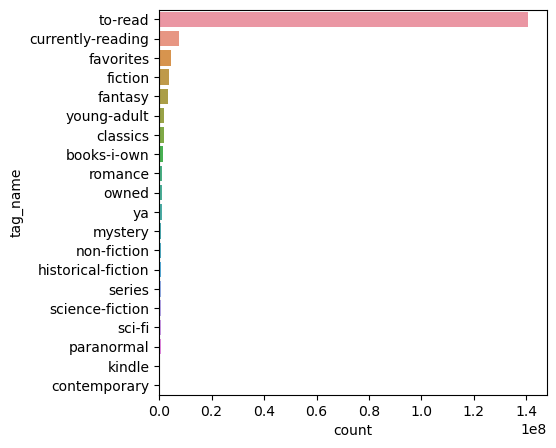

In [51]:
plt.figure(figsize=(5, 5))
sns.barplot(num_by_tags.head(20), x='count', y=num_by_tags.head(20).index, orient='h');